# ML Kaggle Competition

### - Import Libs

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import category_encoders as ce
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor  as rfr
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

### - Reading training defining "Instance" as index column

In [23]:
train = pd.read_csv("D:\Documents\Coursework\Machine_Learning\Kaggle_Assignment/train.csv", index_col = "Instance")
test = pd.read_csv("D:\Documents\Coursework\Machine_Learning\Kaggle_Assignment/test.csv", index_col = "Instance")

In [24]:
# Verifying column names are correct
train.columns

Index(['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
       'Profession', 'University Degree', 'Wears Glasses', 'Hair Color',
       'Body Height [cm]', 'Income in EUR'],
      dtype='object')

In [25]:
test.columns

Index(['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
       'Profession', 'University Degree', 'Wears Glasses', 'Hair Color',
       'Body Height [cm]', 'Income'],
      dtype='object')

In [26]:
# Checking count of nulls in both train and test
np.array([[train.columns],[train.isnull().sum()], [test.isnull().sum()]])

array([[['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
         'Profession', 'University Degree', 'Wears Glasses',
         'Hair Color', 'Body Height [cm]', 'Income in EUR']],

       [[441, 7432, 494, 0, 0, 322, 7370, 0, 7242, 0, 0]],

       [[295, 4862, 279, 0, 0, 195, 4857, 0, 4916, 0, 73230]]],
      dtype=object)

In [27]:
x = stats.zscore(train["Income in EUR"])
x[x>3].shape

(2399,)

#### -  Z score outlier detection strategy is giving ~2400 outliers...Not convinced. Trying manual analysis

In [28]:
train.sort_values('Income in EUR').head(10)

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
Instance,,,,,,,,,,,
19779,2012.0,NaN,21.0,United Arab Emirates,15116,biological scientist,Bachelor,1,Black,197,-5696.906419
90606,2017.0,NaN,15.0,Israel,4226,information systems and quality analyst,Bachelor,1,Black,151,-4912.846178
106524,2016.0,NaN,48.0,Tajikistan,12772,chief engineer of dispute resolutions,Bachelor,1,Brown,210,-3915.539243
74827,2007.0,NaN,44.0,Togo,50052,collections administrator,No,0,Black,159,-3680.798573
78758,2018.0,NaN,20.0,Sierra Leone,31233,human resources college aide,Bachelor,0,Black,188,-3676.159426
37122,2004.0,NaN,21.0,Switzerland,21256,desktop publisher,NaN,0,Black,172,-3435.669983
74117,NaN,female,34.0,Togo,32926,facilities management assistant,Bachelor,0,Blond,136,-3320.153254
27328,2008.0,female,15.0,Austria,69677,dental assistant,No,1,Black,160,-3238.286803
97298,1987.0,female,27.0,Israel,18838,construction inspector,Bachelor,0,Red,119,-3067.030654


In [29]:
train.sort_values('Income in EUR').tail(10)

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
Instance,,,,,,,,,,,
427,2006.0,unknown,62.0,Argentina,2065962,oil burner specialist,Master,1,NaN,200,2165958.301
92518,2008.0,male,71.0,Djibouti,402232,postal service mail carrier,PhD,1,Brown,193,2261278.068
87755,2014.0,male,62.0,Ghana,381199,service asset configuration manager,PhD,1,Brown,176,2342416.851
60588,2008.0,other,42.0,Guyana,64129,Anaesthetist,Master,1,Brown,188,2389023.693
21681,2018.0,male,72.0,Poland,1425888,program assistant,Master,1,Blond,172,2457451.634
77646,2018.0,female,75.0,Cyprus,277093,senior human capital partnership and performan...,PhD,0,Unknown,188,2515870.715
93022,2002.0,other,62.0,Sudan,732735,unit clerk,Master,0,Black,195,2580242.873
60080,2007.0,male,80.0,Angola,130609,triage coordinator,Master,1,Brown,219,3126311.634
108763,2016.0,other,31.0,Vietnam,91384,radiation therapist,Master,1,Brown,187,3213681.751


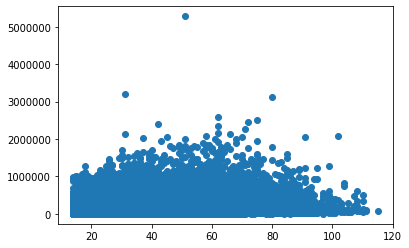

In [30]:
plt.scatter(train["Age"], train["Income in EUR"])  # Smells like an outlier! Let eliminate since its just one record

In [31]:
train = train[train["Income in EUR"]!=train["Income in EUR"].max()]

In [32]:
train["Income in EUR"].min()  # Negative Salary!!! Say what!!

-5696.906419

### - Separating target and features and combining train and test for preprocessing
#### Removing Hair Color, Size of City and Wears Glasses because there was not obvious relation in their individual plots against Income

In [33]:
test_target = test['Income']
test_features = test.drop(columns=["Income"])
train_target = train['Income in EUR']
train_features = train.drop('Income in EUR', axis=1)
test_target = test["Income"]
test_features = test.drop('Income', axis=1)
combined = pd.concat([train_features, test_features])
combined = combined.drop(columns=["Hair Color", "Size of City", "Wears Glasses"])

### Pre-Processing. Handling NAs with various approaches. 

In [34]:
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined["Year of Record"] = combined['Year of Record'].bfill()
combined.Profession = combined.Profession.bfill()
combined['University Degree'].replace('0', np.nan, inplace=True)
combined["University Degree"] = combined['University Degree'].bfill()

#### Checking Unique values in gender. Mapping them to numbers and one hot encoding. "0" has been marked as male.

In [35]:
combined.Gender.unique()

array(['0', 'other', 'female', 'male', nan, 'unknown'], dtype=object)

In [36]:
combined.Gender.fillna('unknown', inplace=True)
# one-hot-encode gender
gender_dic = {'male':0, 'female':1, 'other':2, 'unknown':3, '0':0}
combined.Gender = combined.Gender.map(gender_dic)
one_hot = pd.get_dummies(combined.Gender, prefix='Gender')
combined = combined.drop('Gender', axis=1)
combined = combined.join(one_hot)

#### Checking if any nulls are left

In [37]:
combined.isna().sum()

Year of Record       0
Age                  0
Country              0
Profession           0
University Degree    0
Body Height [cm]     0
Gender_0             0
Gender_1             0
Gender_2             0
Gender_3             0
dtype: int64

### Target Encoding categorical variables

In [39]:
te = ce.TargetEncoder(cols=['Country', 'Profession', 'University Degree', 'Year of Record']).fit(combined.iloc[0:111992,:], train_target)
combined = te.transform(combined)

#### Splitting train and test

In [40]:
train_features = combined.iloc[0:111992, :]
test_features = combined.iloc[111992:, :]

#### Matching Columns

In [41]:
train_features.columns

Index(['Year of Record', 'Age', 'Country', 'Profession', 'University Degree',
       'Body Height [cm]', 'Gender_0', 'Gender_1', 'Gender_2', 'Gender_3'],
      dtype='object')

In [42]:
test_features.columns

Index(['Year of Record', 'Age', 'Country', 'Profession', 'University Degree',
       'Body Height [cm]', 'Gender_0', 'Gender_1', 'Gender_2', 'Gender_3'],
      dtype='object')

### Scaling VAlues

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

C:\Users\Rajat\Anaconda3\envs\FirstProject\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Creating and fitting random forest and predicting the outcome. RMSE is calculated on the same training set

#### Linear Regression and SVM were also tried with the same data but the below model gave the lowest RMSE value

In [44]:
reg = rfr(n_estimators=100, random_state=123, min_samples_split=2, n_jobs=-1)
reg.fit(train_features, train_target)
pred = reg.predict(train_features)
rms = sqrt(mean_squared_error(train_target, pred))
print(rms)

22673.021117278626


#### Predicting on test set and saving csv for submission

In [46]:
pred= reg.predict(test_features)
arr = np.array(range(111994, 185224))
df = pd.DataFrame({'Instance': arr, 'Income': pred})
df.to_csv('D:\Documents\Coursework\Machine_Learning\Kaggle_Assignment\pred_100_trees.csv', index=False)